###Unzipping dataset

In [ ]:
!unzip "/content/drive/MyDrive/Vaccination mortality Analysis/archive.zip" -d "/content/drive/MyDrive/Vaccination mortality Analysis/Unzipped data/"

Archive:  /content/drive/MyDrive/Vaccination mortality Analysis/archive.zip
  inflating: /content/drive/MyDrive/Vaccination mortality Analysis/Unzipped data/covid_vaccination_vs_death_ratio.csv  


###Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msgo
import seaborn as sns
from sklearn.linear_model import LinearRegression
#import geopandas as gpd
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

###Loading Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Vaccination mortality Analysis/Unzipped data/covid_vaccination_vs_death_ratio.csv')
df.head()


,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40146987.0,1.118086
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40146987.0,1.171547
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40146987.0,1.186557
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40146987.0,1.194042
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40146987.0,1.194545


In [ ]:
df.tail()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
21911,21911,Zimbabwe,ZWE,2021-10-22,5814790.0,3271638.0,2543152.0,2,15171742.0,21.564023
21912,21912,Zimbabwe,ZWE,2021-10-23,5826876.0,3276746.0,2550130.0,1,15171742.0,21.597691
21913,21913,Zimbabwe,ZWE,2021-10-24,5836363.0,3281618.0,2554745.0,5,15171742.0,21.629804
21914,21914,Zimbabwe,ZWE,2021-10-25,5848934.0,3287996.0,2560938.0,1,15171742.0,21.671842
21915,21915,Zimbabwe,ZWE,2021-10-26,5866629.0,3294687.0,2571942.0,4,15171742.0,21.715944


###Informations of DataSet

In [ ]:
df.shape

(21916, 10)

In [ ]:
df.describe()

,Unnamed: 0,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
count,21916.000000,2.191600e+04,2.191600e+04,2.191600e+04,21916.000000,2.191600e+04,21916.000000
mean,10957.500000,1.949639e+07,1.238994e+07,7.218532e+06,102.513552,4.848158e+07,31.531167
std,6326.748586,6.835076e+07,4.590490e+07,2.432601e+07,332.678592,1.557119e+08,25.668999
min,0.000000,6.500000e+01,6.400000e+01,1.000000e+00,-41.000000,1.373000e+03,0.000724
25%,5478.750000,4.415168e+05,3.104125e+05,1.081108e+05,1.000000,2.871065e+06,7.848923
50%,10957.500000,2.570544e+06,1.674940e+06,8.143845e+05,9.000000,1.015771e+07,26.255923
75%,16436.250000,1.117111e+07,6.550948e+06,4.446461e+06,54.000000,3.817960e+07,53.202646
max,21915.000000,2.174043e+09,1.100842e+09,1.022207e+09,8786.000000,1.445862e+09,120.321681


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21916 entries, 0 to 21915
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               21916 non-null  int64  
 1   country                  21916 non-null  object 
 2   iso_code                 21916 non-null  object 
 3   date                     21916 non-null  object 
 4   total_vaccinations       21916 non-null  float64
 5   people_vaccinated        21916 non-null  float64
 6   people_fully_vaccinated  21916 non-null  float64
 7   New_deaths               21916 non-null  int64  
 8   population               21916 non-null  float64
 9   ratio                    21916 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.7+ MB


###Visualizing null-values
###Missinggo is a tool used to visualizing null values

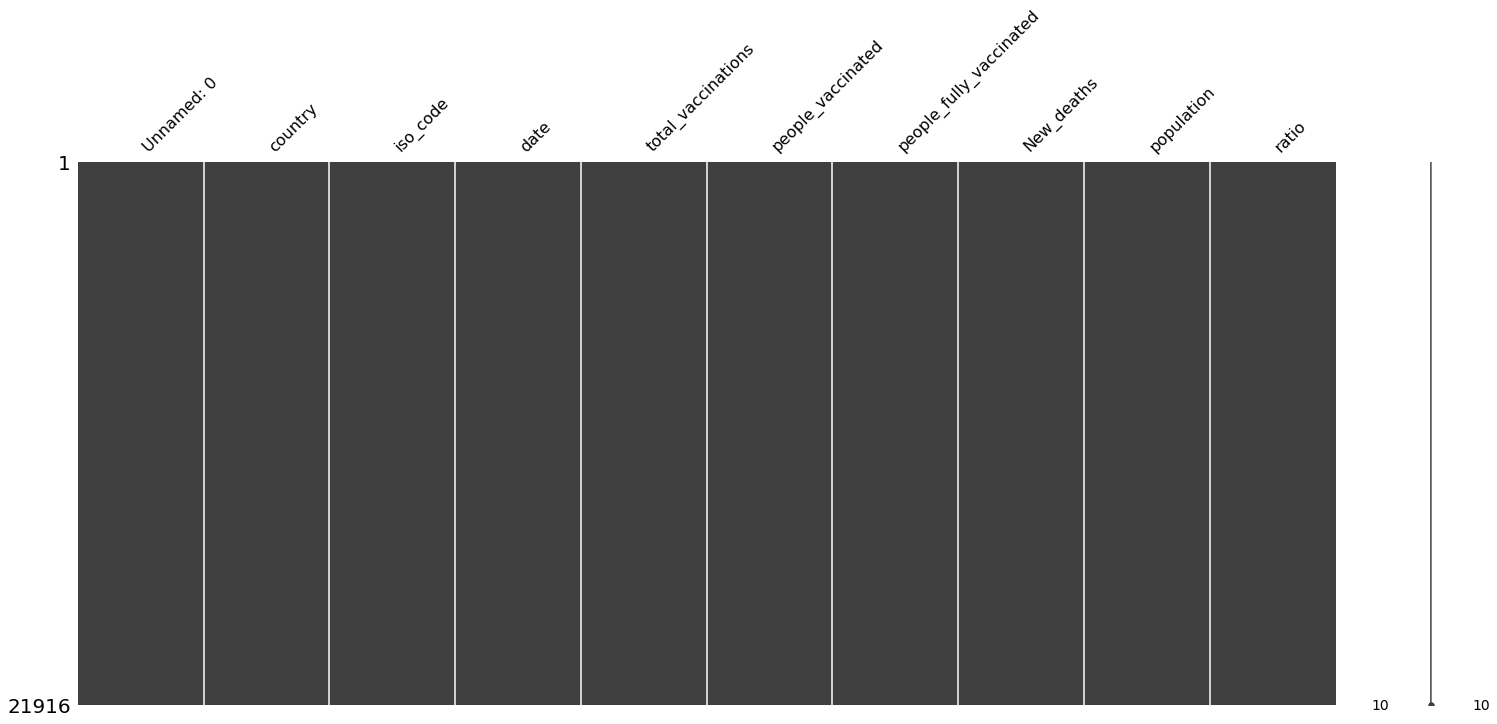

In [ ]:
msgo.matrix(df)

##Deleting Unnamed column

In [ ]:
df.columns
for col in df.columns:
    if col.startswith('Unnamed'):
        del df[col]

df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40146987.0,1.118086
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40146987.0,1.171547
2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40146987.0,1.186557
3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40146987.0,1.194042
4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40146987.0,1.194545


###Number of countries in this dataset

In [ ]:
df['country'].unique().shape

(199,)

###Available data of **Bangladesh** in this dataset

In [ ]:

Bangladeshi_data = df[df['country'] == 'Bangladesh']
Bangladeshi_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
1614,Bangladesh,BGD,2021-04-08,5664830.0,5583507.0,81323.0,74,166848913.0,3.346445
1615,Bangladesh,BGD,2021-04-10,5821476.0,5603450.0,218026.0,77,166848913.0,3.358398
1616,Bangladesh,BGD,2021-04-11,6010824.0,5627107.0,383717.0,78,166848913.0,3.372576
1617,Bangladesh,BGD,2021-04-12,6172159.0,5649563.0,522596.0,83,166848913.0,3.386035
1618,Bangladesh,BGD,2021-04-15,6617036.0,5686885.0,930151.0,94,166848913.0,3.408404


### Ratio of fully vaccinated people  


In [ ]:
#total population in this dataset
total_population = df['population'].unique().sum()
total_population

In [ ]:
#'people_fully_vaccinated' is an accumulation variable we need get the maximum value for each country
# and sum them
df_country = df.groupby('country').agg({'people_fully_vaccinated':max})
sum_vac_full = df_country['people_fully_vaccinated'].sum()
sum_vac_full

2896230313.0

Pie Chart Plotting 

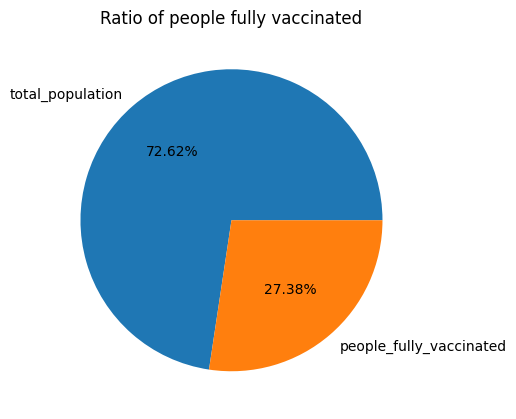

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
plt.pie(
    [total_population,sum_vac_full],
    autopct='%.2F%%',
    labels=['total_population','people_fully_vaccinated'])
plt.title('Ratio of people fully vaccinated')
plt.show()

In [ ]:
#number of people who got at least one shot of COVID vaccine
df_country_vac = df.groupby('country').agg({'people_vaccinated':max}).reset_index()
sum_vac = df_country_vac['people_vaccinated'].sum()
df_country_rat = df.groupby('country').agg({'ratio':max}).reset_index()
df_country_deaths = df.groupby('country').agg({'New_deaths':max}).reset_index()
# df_country_deaths
df_country_rat

,country,ratio
0,Afghanistan,1.919302
1,Albania,34.765148
2,Algeria,14.103538
3,Andorra,70.211363
4,Angola,13.154842
...,...,...
194,Wallis and Futuna,53.154858
195,Yemen,1.002783
196,Zambia,1.628181
197,Zimbabwe,21.715944


### Ratio of people vaccinated

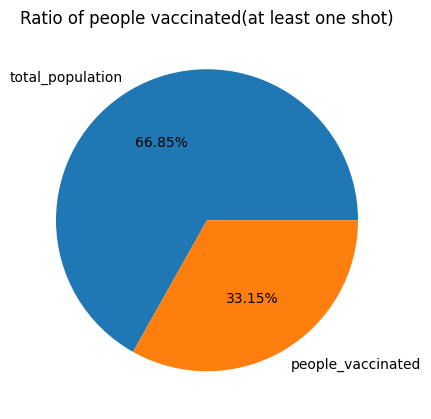

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
plt.pie(
    [total_population,sum_vac],
    autopct='%.2F%%',
    labels=['total_population','people_vaccinated'])
plt.title('Ratio of people vaccinated(at least one shot)')
plt.show()

### Grouping Data Times Series

In [ ]:
date_group = df.groupby('date').agg('sum').reset_index()
date_group

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,2020-12-19,6.500000e+01,6.400000e+01,1.000000e+00,16,8.835350e+06,0.000724
1,2020-12-20,7.447000e+03,7.446000e+03,1.000000e+00,19,8.835350e+06,0.084275
2,2020-12-21,3.234800e+04,3.234700e+04,1.000000e+00,19,8.835350e+06,0.366109
3,2020-12-22,7.697900e+04,7.697800e+04,1.000000e+00,16,8.835350e+06,0.871250
4,2020-12-23,1.398520e+05,1.398510e+05,1.000000e+00,13,8.835350e+06,1.582857
...,...,...,...,...,...,...,...
307,2021-10-22,3.515870e+09,2.091324e+09,1.403748e+09,5396,3.909247e+09,4435.276736
308,2021-10-23,3.852315e+09,2.304636e+09,1.538113e+09,6012,4.702701e+09,4289.015762
309,2021-10-24,3.749639e+09,2.196711e+09,1.532373e+09,4654,4.066654e+09,4428.348336
310,2021-10-25,3.427849e+09,2.033635e+09,1.378926e+09,2652,3.867142e+09,4679.484004


### Plotting line chart

Text(0.5, 1.0, 'total_vaccinations vs New_deaths')

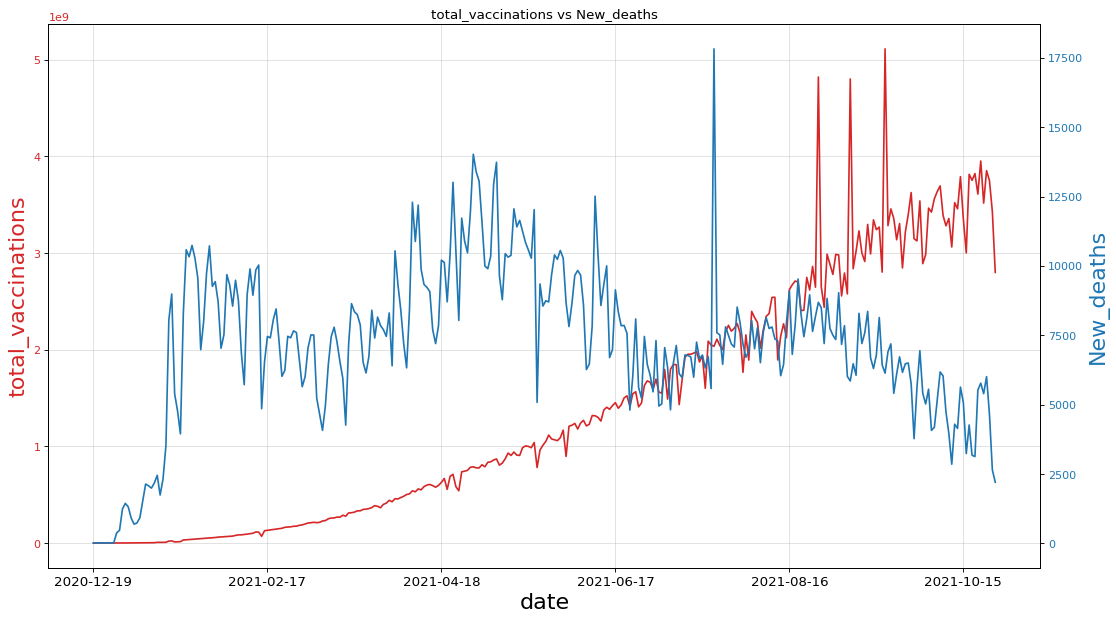

In [ ]:
#preparing data
x = date_group['date']
y1 = date_group['total_vaccinations']
y2 = date_group['New_deaths']

#line 1
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x,y1,color='tab:red')

#line 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:blue')

#decorations line 1
ax1.set_xlabel('date',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=12)
ax1.set_ylabel('total_vaccinations',color='tab:red',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax1.grid(alpha=0.4)

#decorations line 2
ax2.set_ylabel('New_deaths',fontsize=20,color='tab:blue')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax2.set_xticks(np.arange(0,len(x),60))#
ax2.set_title('total_vaccinations vs New_deaths')

### Back to original dateset.
###Relationship Between variables (Plotting Heatmap with seaborn). 
###Now use **corr()** function to find the correlation among the columns.


In [ ]:
df_corr = df.corr()
df_corr

,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
total_vaccinations,1.000000,0.987293,0.953169,0.297616,0.702949,0.172147
people_vaccinated,0.987293,1.000000,0.893901,0.307574,0.755005,0.139391
people_fully_vaccinated,0.953169,0.893901,1.000000,0.263028,0.555155,0.221502
New_deaths,0.297616,0.307574,0.263028,1.000000,0.500991,-0.116548
population,0.702949,0.755005,0.555155,0.500991,1.000000,-0.072480
ratio,0.172147,0.139391,0.221502,-0.116548,-0.072480,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

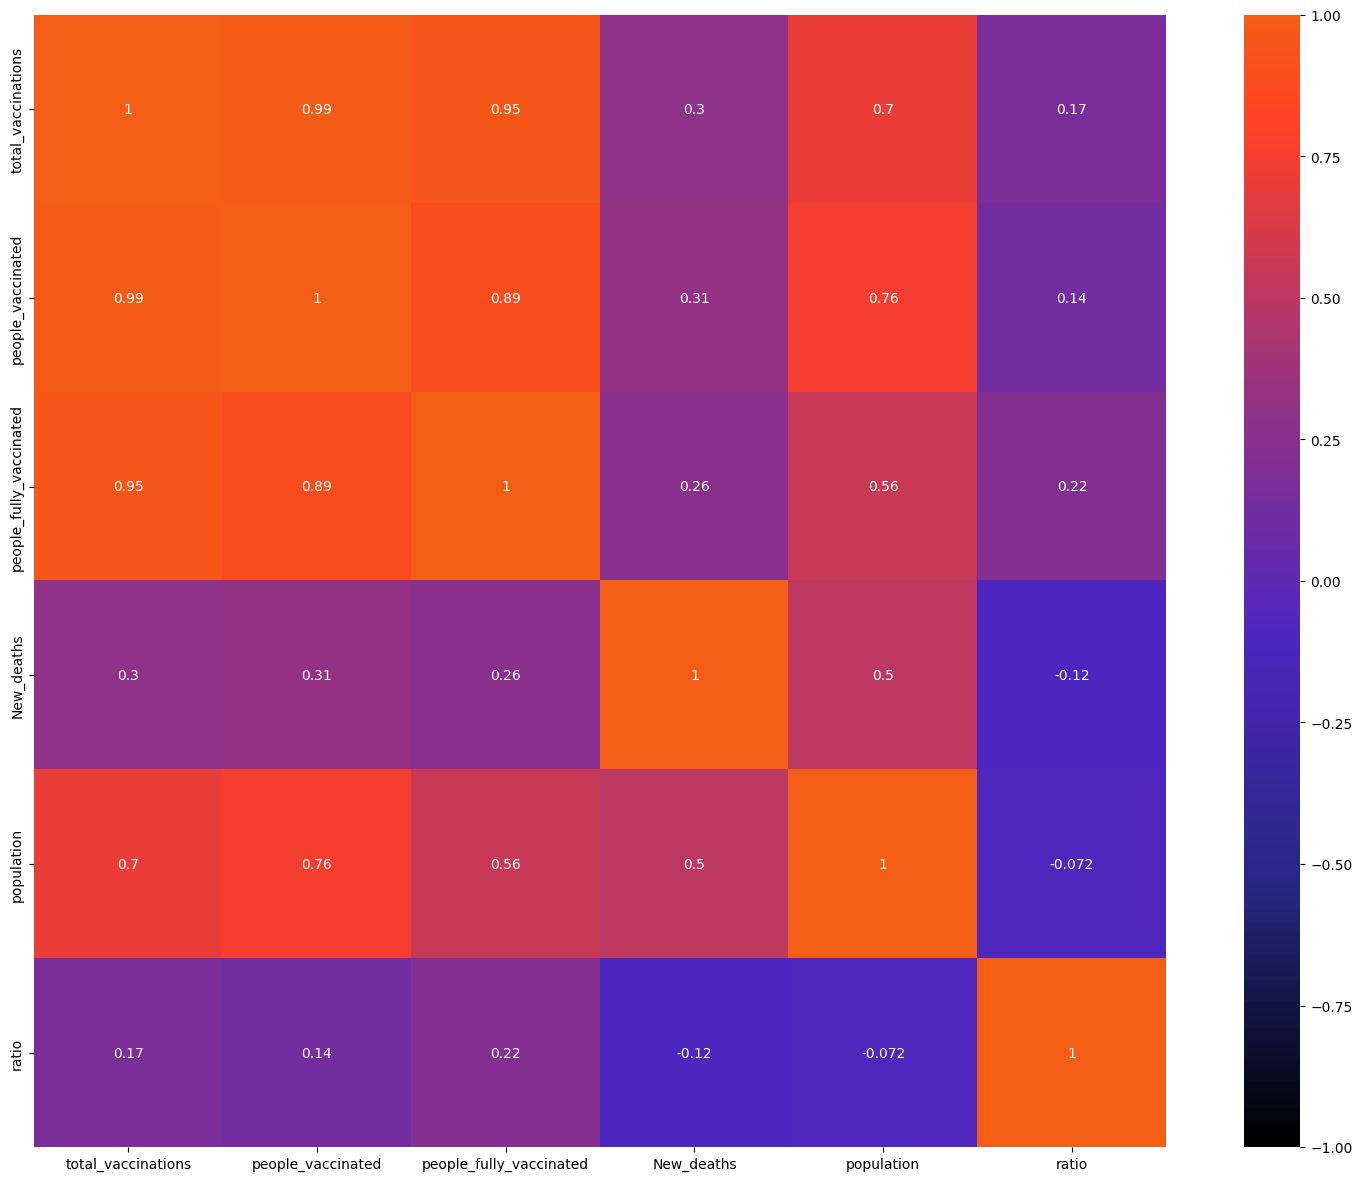

In [ ]:
plt.figure(figsize=(20,15),dpi=100)
sns.heatmap(df_corr,annot=True,square=True,vmin=-1,cmap='CMRmap',center=0.8)
plt.yticks(rotation=90)

Plotting scatter ---> Bangladesh

Text(0.5, 1.0, 'ratio vs New_deaths USA')

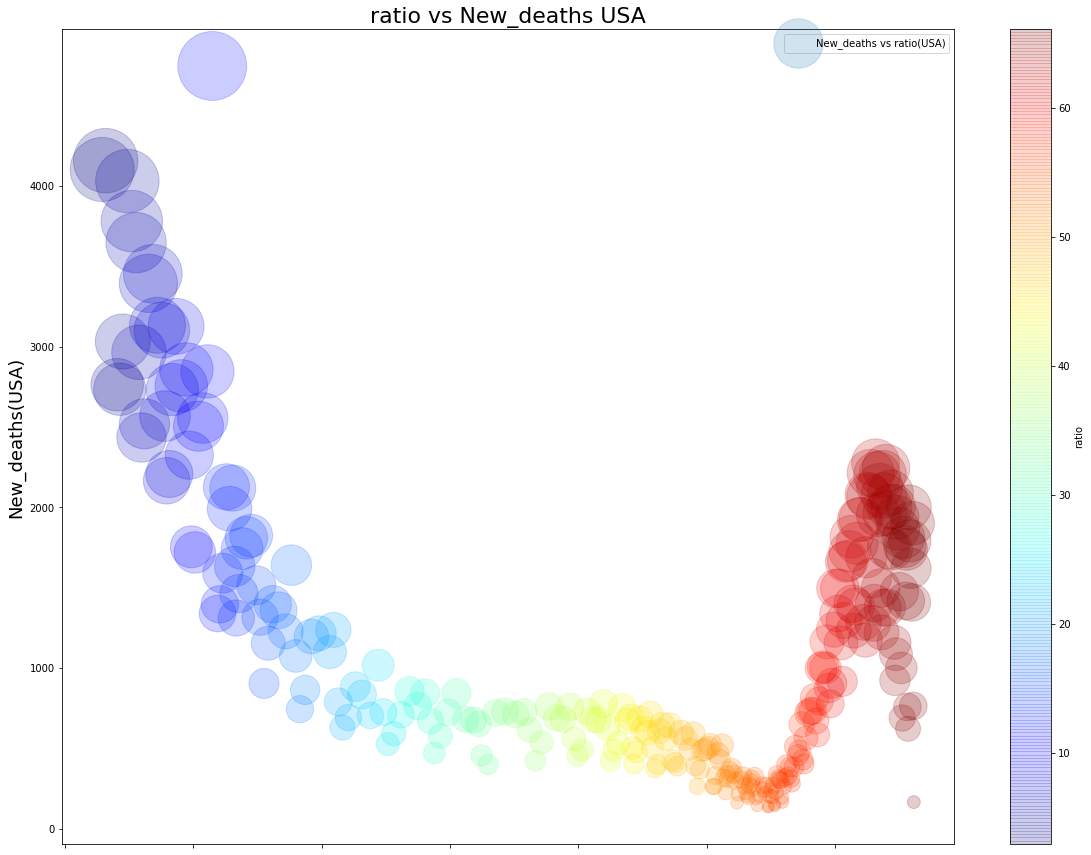

In [ ]:
df_usa = df[df['country']=='United States of America']
df_usa.plot(
    kind='scatter',
    x='ratio',
    y='New_deaths',
    label='New_deaths vs ratio(USA)',
    alpha=0.2,
    figsize=(20,15),
    s=df_usa['New_deaths'],
    c='ratio',
    cmap=plt.get_cmap('jet'),
    colorbar=True)

plt.xlabel('ratio(%)',fontsize=15)
plt.ylabel('New_deaths(USA)',fontsize=18)
plt.title('ratio vs New_deaths USA',fontsize=22)
# The radius of each circle represents the district’s population (option s), and the color represents the price (option c).

### Daily World Deaths

In [ ]:
date_group
time = date_group['date'].values.tolist()

px.line(x=time,y=date_group['New_deaths'].cumsum())
# In this case New Deaths is a cumulative number so we use function cumsum())

### Machine Learning ：Simple Liner Regression

In [ ]:
# define x,y
x = df_usa[['ratio']]
y = df_usa[['New_deaths']]

# split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# Standard Normalization(x)
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.fit_transform(x_test)

# Standard Normalization(y)
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train)
y_test = std_y.fit_transform(y_test)

# fitting in
liner = LinearRegression()
liner.fit(x_train,y_train)
# coefficients
print ('Coefficients: ', liner.coef_)
print ('Intercept: ',liner.intercept_)

# prediction
y_pre = std_y.inverse_transform(liner.predict(x_test))# inverse to original value
print('The prediction of New Deaths is :\n',y_pre)

Coefficients:  [[-0.45892552]]
Intercept:  [-1.1830593e-17]
The prediction of New Deaths is :
 [[1712.43643088]
 [ 986.78964119]
 [ 871.55553202]
 [1027.78312967]
 [ 818.40671619]
 [ 775.66529928]
 [ 748.55871994]
 [ 852.02962195]
 [ 743.56743276]
 [ 980.6271599 ]
 [1326.3203893 ]
 [ 865.5818235 ]
 [ 789.66650205]
 [ 725.13149855]
 [ 726.48745076]
 [ 970.59895669]
 [ 856.34870861]
 [1507.75972292]
 [1266.22344527]
 [ 766.47061452]
 [1636.19825206]
 [1384.07867183]
 [ 905.23491456]
 [ 831.65595656]
 [ 900.91047869]
 [ 833.85044971]
 [ 926.98969448]
 [1654.48674527]
 [1825.21153244]
 [1079.19087801]
 [1756.33683176]
 [1107.77517326]
 [1748.34492691]
 [1061.45444963]
 [1025.17812634]
 [1358.33952944]
 [ 781.9330758 ]
 [ 777.53614875]
 [1839.12108988]
 [1427.58989292]
 [1627.82542934]
 [1031.09683105]
 [1451.7560581 ]
 [1743.13648182]
 [1085.70248648]
 [1006.59591953]
 [1775.3339898 ]
 [ 734.39631552]
 [ 825.58772321]
 [1121.14959395]
 [1249.22949359]
 [ 894.46824933]
 [ 944.90923078]
 [17

### Plotting with regression line

Text(0.5, 1.0, 'Liner Regression')

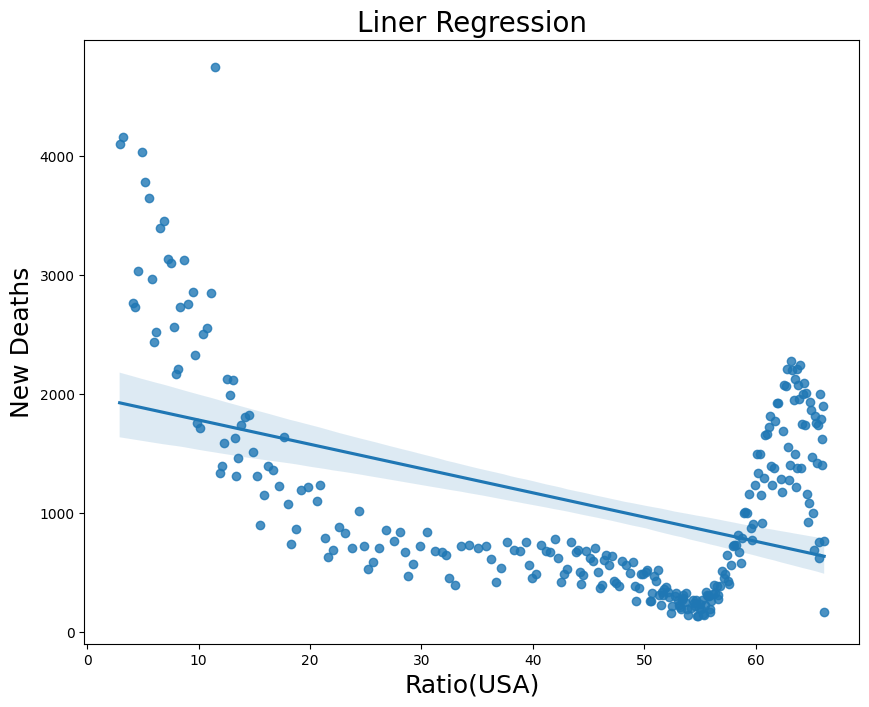

In [ ]:
x = df_usa['ratio']
y = df_usa['New_deaths']

plt.figure(figsize=(10,8),dpi=100)
sns.regplot(x=x, y=y)
plt.xlabel('Ratio(USA)',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.title('Liner Regression',fontsize=20)

### Mean Squared Error(MSE)

In [ ]:
mse = mean_squared_error(std_y.inverse_transform(y_test),y_pre)

# make sure the output not show with scientific notation
def as_float(x):
    y='{:.50f}'.format(x)
    return  y

print('The Mean Squared Error(MSE) of y_pre is :',as_float(mse))

The Mean Squared Error(MSE) of y_pre is : 540261.91479349113069474697113037109375000000000000000000


In [ ]:
mae = mean_absolute_error(std_y.inverse_transform(y_test),y_pre)
print('The Mean Absolute Error(MAE) of y_pre is :',as_float(mae))

The Mean Absolute Error(MAE) of y_pre is : 632.35140515823491114133503288030624389648437500000000
